In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른 팁의 비율의 평균 값을 구하고 그래프 시각화

In [ ]:
# 컬럼의 이름을 변경 
tips.columns = ['총금액', '팁', '성별', 
                '흡연여부', '요일', '시간', '인원']
tips.head(1)

In [ ]:
# 총금액, 팁 컬럼을 선택
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)

In [ ]:
# 팁의비율 -> 팁 / 총금액 * 100
# 새로운 파생변수 팁의비율을 생성
# 소수점 1자리까지 두고 반올림
tips['팁의비율'] = (tips['팁'] / tips['총금액'] * 100).round(1)

In [ ]:
tips.head()

In [ ]:
# 시각화 라이브러리 로드 
import matplotlib.pyplot as plt

In [24]:
group_data = tips[['인원', '성별', '팁의비율']].groupby(['인원', '성별']).mean()

In [ ]:
group_data.index

In [ ]:
# 그래프 시각화 (바그래프)
x = range(0, len(group_data.index))
y = group_data['팁의비율']

plt.barh(x, y)
# x축의 데이터를 index을 값으로 대체
plt.yticks(x, group_data.index)
plt.show()

### pivot_table
1. 그룹화
2. 인덱스와 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다.

In [ ]:
pivot_data = pd.pivot_table(
    tips, 
    index = '인원', 
    columns = '성별', 
    values = ['팁의비율'], 
    aggfunc = 'mean'
)
pivot_data

In [27]:
import platform

In [28]:
# matplotlib에서 폰트를 변경
if platform.system() == 'Darwin': # MAC인 경우
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<AxesSubplot: xlabel='인원'>

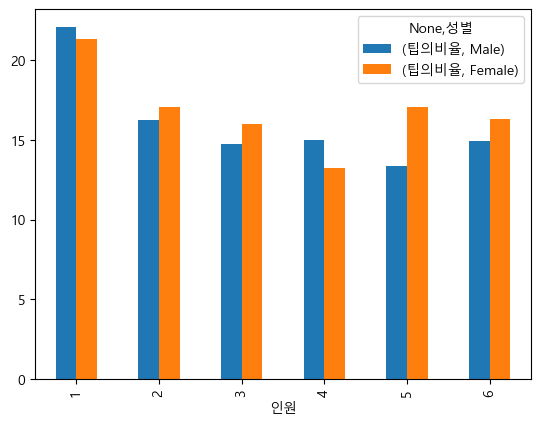

In [29]:
pivot_data.plot.bar()